In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

In [2]:
# Evaluation results 

from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sn
import pandas as pd

def eval_model(model, test_images, test_labels):
    y_pred = model.predict(test_images)
    y_pred = y_pred = np.argmax(y_pred, axis=-1)
    
    acc = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='macro')
    recall = recall_score(test_labels, y_pred, average='macro')
        
    print("Accuracy: " + str(np.mean(acc)))
    print("Precision: " + str(np.mean(precision)))
    print("Recall: " + str(np.mean(recall)))

# Original Test Data (T1)

In [3]:
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()

test_images = test_images / 255.

test_images = tf.reshape(test_images, (10000, 28, 28, 1))
test_labels = tf.reshape(test_labels, (10000, 1))
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28, 1)
(10000, 1)


In [4]:
test_labels

<tf.Tensor: shape=(10000, 1), dtype=uint8, numpy=
array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)>

In [5]:
model = keras.models.load_model(r'C:\Users\MINH LE\Desktop\TraditionalvsCNN\Additional Experiments\mnist\models\model_mnist_t2.h5')

In [6]:
eval_model(model, test_images, test_labels)

Accuracy: 0.9898
Precision: 0.989740248707615
Recall: 0.9896380515604781


# Updated Test Data with Different Brightness (T2)

In [7]:
import os
import glob
import cv2

In [8]:
DATA_DIR = 'C:/Users/MINH LE/Desktop/TraditionalvsCNN/testset-T2/'

list_files = os.listdir(DATA_DIR)
number_files = len(list_files)
list_files

['cifar10', 'mnist']

In [9]:
mnist_test_t2_images = []

MNIST_T2_DIR = DATA_DIR + 'mnist/'
for img in glob.glob(MNIST_T2_DIR + '*.png'):
    n = cv2.imread(img, 0)
    mnist_test_t2_images.append(n)


mnist_test_t2_images = tf.convert_to_tensor(mnist_test_t2_images, dtype=np.float32)
mnist_test_t2_images = mnist_test_t2_images / 255.
mnist_test_t2_images = tf.reshape(mnist_test_t2_images, [10000, 28, 28, 1])
mnist_test_t2_images.shape

TensorShape([10000, 28, 28, 1])

In [10]:
mnist_test_t2_images[0].shape

TensorShape([28, 28, 1])

In [11]:
eval_model(model, mnist_test_t2_images, test_labels)

Accuracy: 0.1013
Precision: 0.09883840772629283
Recall: 0.09854165113160995


C:\Users\MINH LE\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


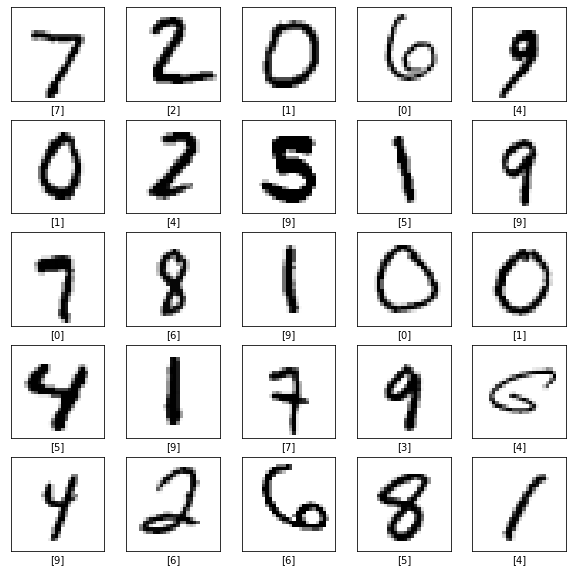

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist_test_t2_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels.numpy()[i])
plt.show()